In [110]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
from time import sleep
import json
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

from requests import Request, Session
import json
import time
import webbrowser
import pprint

from time import sleep
print('Finish import package')

Finish import package


# Lấy data coin

In [111]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'YOUR_API_KEY',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

# If that didn't work try using the local host URL as shown in the video

In [112]:
type(data)

dict

In [113]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [114]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])

In [115]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,10082,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19311768.00000,19311768.00000,NaN,1,NaN,NaN,None,2023-03-08T13:11:00.000Z,22018.05281,24871480449.69629,53.16970,-0.32468,-1.72350,-7.15560,-3.89006,30.07390,30.88157,425207527738.33960,42.14350,462379109075.10999,None,2023-03-08T13:11:00.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,6559,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122373866.21780,122373866.21780,NaN,2,NaN,NaN,None,2023-03-08T13:11:00.000Z,1553.37313,7406485197.32932,48.01640,-0.26478,-0.87966,-5.89907,-5.01269,22.84722,25.49515,190092275913.65314,18.83880,190092275913.64999,None,2023-03-08T13:11:00.000Z,NaN,NaN,NaN,NaN,NaN
2,825,Tether,USDT,tether,48917,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,71736434909.61824,73141766321.23428,NaN,3,NaN,NaN,None,2023-03-08T13:11:00.000Z,1.00002,33091577749.92065,36.78660,0.00132,0.00146,-0.01051,-0.01616,0.01925,-0.00627,71737541396.96553,7.11150,73142894484.89000,None,2023-03-08T13:11:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
3,1839,BNB,BNB,bnb,1209,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,157893626.15589,159979963.59043,NaN,4,NaN,NaN,None,2023-03-08T13:11:00.000Z,288.09075,391555282.18563,20.11700,0.03083,0.44494,-4.83042,-12.30459,10.59880,0.98293,45487692981.52979,4.50910,46088747495.18000,None,2023-03-08T13:11:00.000Z,NaN,NaN,NaN,NaN,NaN
4,3408,USD Coin,USDC,usd-coin,10487,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,43531917773.99540,43531917773.99540,NaN,5,NaN,NaN,None,2023-03-08T13:11:00.000Z,0.99983,3722827515.50479,35.67040,-0.01675,-0.02785,-0.00950,-0.04337,-0.02485,-0.01756,43524491421.38508,4.31450,43524491421.39000,None,2023-03-08T13:11:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
5,52,XRP,XRP,xrp,900,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,50950912949.00000,99989113908.00000,NaN,6,NaN,NaN,None,2023-03-08T13:11:00.000Z,0.39584,1718147709.18247,52.96680,2.33816,5.74862,4.00108,-0.59704,15.45587,2.68162,20168480448.49145,1.99930,39584139480.84000,None,2023-03-08T13:11:00.000Z,NaN,NaN,NaN,NaN,NaN
6,2010,Cardano,ADA,cardano,671,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34683084394.68900,35556027433.16000,NaN,7,NaN,NaN,None,2023-03-08T13:11:00.000Z,0.32202,278699528.77924,25.25230,-0.57424,-1.79218,-11.06856,-17.89999,17.60172,4.00788,11168784747.85690,1.10720,14491078934.45000,None,2023-03-08T13:11:00.000Z,NaN,NaN,NaN,NaN,NaN
7,3890,Polygon,MATIC,polygon,602,2019-04-28T00:00:00.000Z,"[platform, enterprise-solutions, zero-knowledg...",10000000000.00000,8734317475.28493,10000000000.00000,NaN,8,NaN,NaN,None,2023-03-08T13:11:00.000Z,1.11558,499655359.57315,40.51410,-0.53613,-2.80758,-10.65810,-7.62794,38.81118,23.75122,9743859345.85242,0.96570,11155833725.33000,None,2023-03-08T13:11:00.000Z,NaN,NaN,NaN,NaN,NaN
8,74,Dogecoin,DOGE,dogecoin,653,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,132670764299.89409,132670764299.89409,NaN,9,NaN,NaN,None,2023-03-08T13:11:00.000Z,0.07338,282488648.92908,13.0

In [116]:
# One thing I noticed was the scientific notation. I like it, but I want to be able to see the numbers in this case

# pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [117]:
(df)

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,10082,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19311768.00000,19311768.00000,NaN,1,NaN,NaN,None,2023-03-08T13:11:00.000Z,22018.05281,24871480449.69629,53.16970,-0.32468,-1.72350,-7.15560,-3.89006,30.07390,30.88157,425207527738.33960,42.14350,462379109075.10999,None,2023-03-08T13:11:00.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,6559,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122373866.21780,122373866.21780,NaN,2,NaN,NaN,None,2023-03-08T13:11:00.000Z,1553.37313,7406485197.32932,48.01640,-0.26478,-0.87966,-5.89907,-5.01269,22.84722,25.49515,190092275913.65314,18.83880,190092275913.64999,None,2023-03-08T13:11:00.000Z,NaN,NaN,NaN,NaN,NaN
2,825,Tether,USDT,tether,48917,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,71736434909.61824,73141766321.23428,NaN,3,NaN,NaN,None,2023-03-08T13:11:00.000Z,1.00002,33091577749.92065,36.78660,0.00132,0.00146,-0.01051,-0.01616,0.01925,-0.00627,71737541396.96553,7.11150,73142894484.89000,None,2023-03-08T13:11:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
3,1839,BNB,BNB,bnb,1209,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,157893626.15589,159979963.59043,NaN,4,NaN,NaN,None,2023-03-08T13:11:00.000Z,288.09075,391555282.18563,20.11700,0.03083,0.44494,-4.83042,-12.30459,10.59880,0.98293,45487692981.52979,4.50910,46088747495.18000,None,2023-03-08T13:11:00.000Z,NaN,NaN,NaN,NaN,NaN
4,3408,USD Coin,USDC,usd-coin,10487,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,43531917773.99540,43531917773.99540,NaN,5,NaN,NaN,None,2023-03-08T13:11:00.000Z,0.99983,3722827515.50479,35.67040,-0.01675,-0.02785,-0.00950,-0.04337,-0.02485,-0.01756,43524491421.38508,4.31450,43524491421.39000,None,2023-03-08T13:11:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
5,52,XRP,XRP,xrp,900,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,50950912949.00000,99989113908.00000,NaN,6,NaN,NaN,None,2023-03-08T13:11:00.000Z,0.39584,1718147709.18247,52.96680,2.33816,5.74862,4.00108,-0.59704,15.45587,2.68162,20168480448.49145,1.99930,39584139480.84000,None,2023-03-08T13:11:00.000Z,NaN,NaN,NaN,NaN,NaN
6,2010,Cardano,ADA,cardano,671,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34683084394.68900,35556027433.16000,NaN,7,NaN,NaN,None,2023-03-08T13:11:00.000Z,0.32202,278699528.77924,25.25230,-0.57424,-1.79218,-11.06856,-17.89999,17.60172,4.00788,11168784747.85690,1.10720,14491078934.45000,None,2023-03-08T13:11:00.000Z,NaN,NaN,NaN,NaN,NaN
7,3890,Polygon,MATIC,polygon,602,2019-04-28T00:00:00.000Z,"[platform, enterprise-solutions, zero-knowledg...",10000000000.00000,8734317475.28493,10000000000.00000,NaN,8,NaN,NaN,None,2023-03-08T13:11:00.000Z,1.11558,499655359.57315,40.51410,-0.53613,-2.80758,-10.65810,-7.62794,38.81118,23.75122,9743859345.85242,0.96570,11155833725.33000,None,2023-03-08T13:11:00.000Z,NaN,NaN,NaN,NaN,NaN
8,74,Dogecoin,DOGE,dogecoin,653,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,132670764299.89409,132670764299.89409,NaN,9,NaN,NaN,None,2023-03-08T13:11:00.000Z,0.07338,282488648.92908,13.0

In [118]:
# Now let's look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.32468,-1.72350,-7.15560,-3.89006,30.07390,30.88157
Ethereum,-0.26478,-0.87966,-5.89907,-5.01269,22.84722,25.49515
Tether,0.00132,0.00146,-0.01051,-0.01616,0.01925,-0.00627
BNB,0.03083,0.44494,-4.83042,-12.30459,10.59880,0.98293
USD Coin,-0.01675,-0.02785,-0.00950,-0.04337,-0.02485,-0.01756
XRP,2.33816,5.74862,4.00108,-0.59704,15.45587,2.68162
Cardano,-0.57424,-1.79218,-11.06856,-17.89999,17.60172,4.00788
Polygon,-0.53613,-2.80758,-10.65810,-7.62794,38.81118,23.75122
Dogecoin,-0.24123,-1.10243,-10.48644,-20.39392,1.85317,-23.50074


In [119]:
df4 =df3.stack()

In [120]:
df5 = df4.to_frame(name='values')
df5

values
name                                         
Bitcoin quote.USD.percent_change_1h  -0.32468
        quote.USD.percent_change_24h -1.72350
        quote.USD.percent_change_7d  -7.15560
        quote.USD.percent_change_30d -3.89006
        quote.USD.percent_change_60d 30.07390
...                                       ...
TRON    quote.USD.percent_change_24h -1.13488
        quote.USD.percent_change_7d  -5.29333
        quote.USD.percent_change_30d  4.04273
        quote.USD.percent_change_60d 27.75831
        quote.USD.percent_change_90d 23.86621

[90 rows x 1 columns]

In [121]:
#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe. You can make this more dynamic, but I'm just going to hard code it


index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.reset_index()
df6

# If it only has the index and values try doing reset_index like "df5.reset_index()"

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.32468
1,Bitcoin,quote.USD.percent_change_24h,-1.72350
2,Bitcoin,quote.USD.percent_change_7d,-7.15560
3,Bitcoin,quote.USD.percent_change_30d,-3.89006
4,Bitcoin,quote.USD.percent_change_60d,30.07390
...,...,...,...
85,TRON,quote.USD.percent_change_24h,-1.13488
86,TRON,quote.USD.percent_change_7d,-5.29333
87,TRON,quote.USD.percent_change_30d,4.04273
88,TRON,quote.USD.percent_change_60d,27.75831


In [122]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.32468
1,Bitcoin,quote.USD.percent_change_24h,-1.72350
2,Bitcoin,quote.USD.percent_change_7d,-7.15560
3,Bitcoin,quote.USD.percent_change_30d,-3.89006
4,Bitcoin,quote.USD.percent_change_60d,30.07390
...,...,...,...
85,TRON,quote.USD.percent_change_24h,-1.13488
86,TRON,quote.USD.percent_change_7d,-5.29333
87,TRON,quote.USD.percent_change_30d,4.04273
88,TRON,quote.USD.percent_change_60d,27.75831


In [123]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h', '24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.32468
1,Bitcoin,24h,-1.72350
2,Bitcoin,7d,-7.15560
3,Bitcoin,30d,-3.89006
4,Bitcoin,60d,30.07390
...,...,...,...
85,TRON,24h,-1.13488
86,TRON,7d,-5.29333
87,TRON,30d,4.04273
88,TRON,60d,27.75831


In [124]:
import seaborn as sns
import matplotlib.pyplot as plt

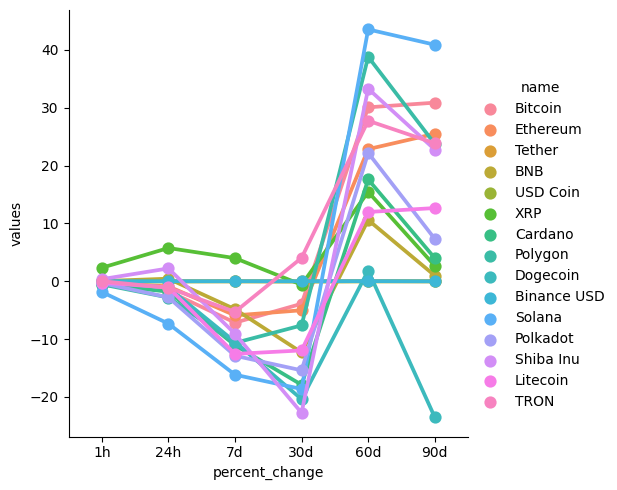

In [125]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')
